In [353]:
# Common imports
import sys

# Third-party imports
import pandas as pd
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [457]:
from pandas.tseries import offsets
start_date = pd.to_datetime('2016-01-01')
end_date = start_date + YearEnd()
payroll_amount = 1783.68
date_index = pd.date_range(start_date, end_date, freq='M')
movements = pd.DataFrame([payroll_amount]*date_index.shape[0], columns=['amount'], index=date_index)
movements['description'] = 'payroll'
movements

,amount,description
2016-01-31,1783.68,payroll
2016-02-29,1783.68,payroll
2016-03-31,1783.68,payroll
2016-04-30,1783.68,payroll
2016-05-31,1783.68,payroll
2016-06-30,1783.68,payroll
2016-07-31,1783.68,payroll
2016-08-31,1783.68,payroll
2016-09-30,1783.68,payroll
2016-10-31,1783.68,payroll


In [458]:
def add_expense(df, DOP=0, amount=0, description='', freq='MS', day_randshift=0, amount_sigma=0):
    start_date = pd.datetime(df.index[0].year, df.index[0].month, 1)
    end_date = start_date + offsets.YearEnd()
    date_index = pd.date_range(start_date, end_date, freq=freq) + offsets.DateOffset(days=DOP-1)
    expense = pd.DataFrame(date_index, columns=['date'])
    expense['date_offset'] = np.random.randint(-day_randshift, day_randshift+1, size=expense.shape[0])
    expense['date'] = expense.apply(lambda row: row['date'] + offsets.DateOffset(days=row['date_offset']), axis=1)
    expense.drop('date_offset', axis=1, inplace=True)
    expense['amount'] = -(amount_sigma * np.random.randn(expense.shape[0]) + amount)
    expense['amount'] = expense['amount'].round(2)
    expense['description'] = description
    expense.set_index('date', drop=True, inplace=True)
    return df.append(expense).sort_index()

In [459]:
movements = add_expense(movements, DOP=1, amount=200, description='savings', freq='MS', day_randshift=0)
movements = add_expense(movements, DOP=5, amount=750, description='rent', freq='MS', day_randshift=1)
movements = add_expense(movements, DOP=9, amount=55, description='water bill', freq='2MS', day_randshift=2, amount_sigma=3)
movements = add_expense(movements, DOP=10, amount=80, description='utility bill', freq='MS', day_randshift=2, amount_sigma=15)
movements = add_expense(movements, DOP=15, amount=60, description='internet/phone bill', freq='MS', day_randshift=2, amount_sigma=5)
movements = add_expense(movements, DOP=20, amount=25, description='cellphone bill', freq='MS', day_randshift=2, amount_sigma=5)
movements = add_expense(movements, DOP=1, amount=60, description='groceries', freq='W-SAT', day_randshift=0, amount_sigma=15)
movements = add_expense(movements, DOP=1, amount=80, description='cash withdrawal', freq='W-FRI', day_randshift=1)
movements = add_expense(movements, DOP=5, amount=150, description='shopping', freq='3MS', day_randshift=2, amount_sigma=20)
movements

,amount,description
2016-01-01,-200.00,savings
2016-01-02,-80.00,cash withdrawal
2016-01-02,-35.69,groceries
2016-01-04,-750.00,rent
2016-01-05,-122.86,shopping
2016-01-07,-55.57,water bill
2016-01-09,-80.00,cash withdrawal
2016-01-09,-40.74,groceries
2016-01-10,-89.15,utility bill
2016-01-13,-58.72,internet/phone bill


In [460]:
movements['balance'] = 2000 + movements.amount.cumsum()
movements

,amount,description,balance
2016-01-01,-200.00,savings,1800.00
2016-01-02,-80.00,cash withdrawal,1720.00
2016-01-02,-35.69,groceries,1684.31
2016-01-04,-750.00,rent,934.31
2016-01-05,-122.86,shopping,811.45
2016-01-07,-55.57,water bill,755.88
2016-01-09,-80.00,cash withdrawal,675.88
2016-01-09,-40.74,groceries,635.14
2016-01-10,-89.15,utility bill,545.99
2016-01-13,-58.72,internet/phone bill,487.27


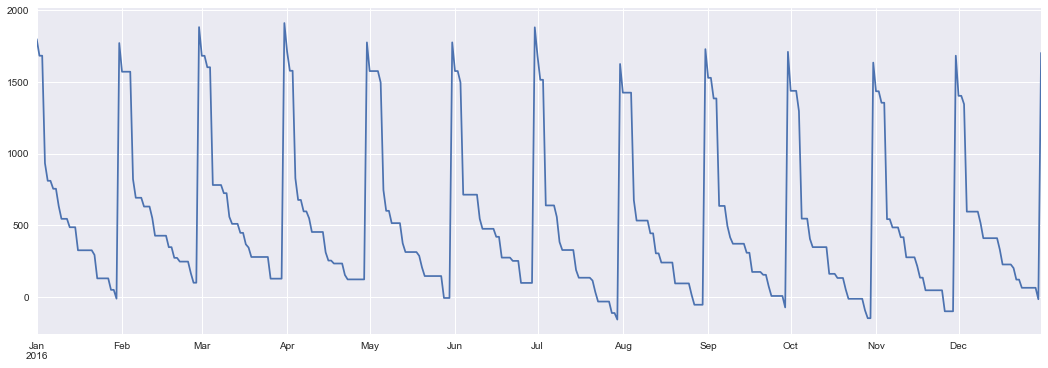

In [464]:
movements.balance.resample('D').last().ffill().plot(figsize=(18,6))